# Grover's Search with Qiskit

## Importing necessary libraries 

In [1]:
from qiskit.quantum_info import Operator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

## Making a 2 Qubit Grover's Oracle marking |01> State

It is important to note that the Operator function uses our ordering system, therefore when visualizing our probability histograms, we do not need to reverse the ordering of the qubits. 

Experiment by marking the other states as well - |00>, |10> and |11>

In [2]:
U = Operator([[1,0,0,0], [0,-1,0,0], [0,0,1,0], [0,0,0,1]])

In [3]:
print(U)

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


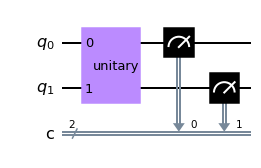

In [4]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

qcirc = QuantumCircuit(2, 2, name = 'qc')
qcirc.append(U, qr)
for i in range(len(qr)):
    qcirc.measure(qr[i], cr[i])
qcirc.draw('mpl')

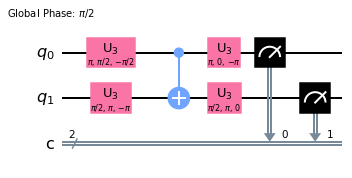

In [5]:
# Decomposing the Oracle into unitary gates

qcirc_decompose = qcirc.decompose()
qcirc_decompose.draw('mpl')

The decomposition of a 4x4 Unitary is based on this paper - https://arxiv.org/abs/0806.4015
This paper describes the KAK decomposition method which uses optimal number of CNOT gates

## Check if Operator is Unitary

In [6]:
U.is_unitary()

True

## Constructing our Grover's Algorithm Circuit

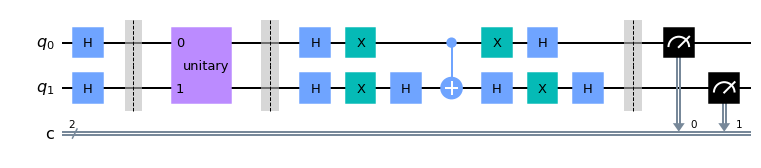

In [7]:
# Number of Qubits 
num_qubits = 2

# Defining Quantum, Classical Registers and Quantum Circuit 
qr = QuantumRegister(num_qubits, 'q')
cr = ClassicalRegister(num_qubits, 'c')

qcirc = QuantumCircuit(qr, cr)

# Step 1 - Applying Hadamard Gates to all the Qubits
for i in range(num_qubits):
    qcirc.h(i)

qcirc.barrier()

# Step 2 - Applying the Grover's Oracle Operator
qcirc.append(U, qr)

qcirc.barrier()

# Step 3 - Grover's Diffusion Circuit 
for qubit in range(num_qubits):
    qcirc.h(qubit)
for qubit in range(num_qubits):
    qcirc.x(qubit)
qcirc.h(num_qubits-1)
qcirc.mct(list(range(num_qubits-1)), num_qubits-1)
qcirc.h(num_qubits-1)
for qubit in range(num_qubits):
    qcirc.x(qubit)
for qubit in range(num_qubits):
    qcirc.h(qubit)
    
qcirc.barrier()

# Measuring all the Qubits 
qcirc.measure([0,1],[0,1])

# Visualizing the Grover's Circuit 
qcirc.draw('mpl')

## Simulating 2 Qubit Grover's Circuit


Total counts are: {'01': 1000}


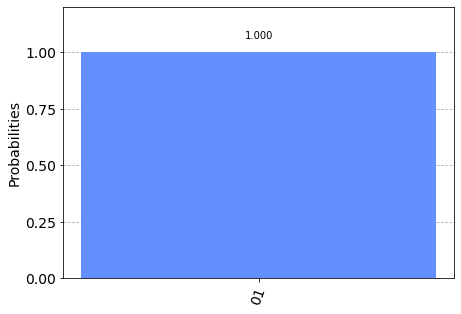

In [8]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qcirc, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qcirc)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

As can be seen from the results we have indeed attained our marked state |01> and due to the Operator function ordering, we do not need to reverse the ordering of the qubits here. We get the exact ordering which we want. 

## Making a 3 Qubit Grover's Oracle marking |101> and |110> States

Experiment with the code by marking different 2 states. If you mark 3 states together then you will observe that the algorithm is able to find the 3 states with higher probabilities in only 1 iteration of oracle+diffusion. Experiment marking any 3 states as well! 

If you mark 4 or more states then, let's say you mark all the states negative except the |000> state, the you will find that the algorithm actually takes the |000> as the marked state and gives it highest probability of occurence. 

In [9]:
U_3 = Operator([[1,0,0,0,0,0,0,0], 
                [0,1,0,0,0,0,0,0], 
                [0,0,1,0,0,0,0,0], 
                [0,0,0,1,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,-1,0,0],
                [0,0,0,0,0,0,-1,0],
                [0,0,0,0,0,0,0,1]])

In [10]:
print(U_3)

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


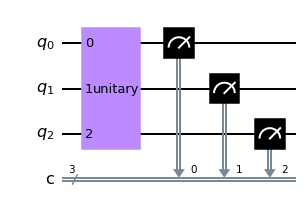

In [11]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')

qcirc = QuantumCircuit(qr, cr)
qcirc.append(U_3, qr)
for i in range(len(qr)):
    qcirc.measure(qr[i], cr[i])
qcirc.draw('mpl')

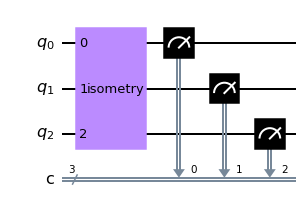

In [12]:
# Decomposing the Oracle into unitary gates

qcirc_decompose = qcirc.decompose()
qcirc_decompose.draw('mpl')

For the decomposition of unitaries above 4x4, the isometry class from Qiskit is utilized which is implemented based on this paper - https://arxiv.org/abs/1501.06911
The paper describes a method which is able to achieve a theoretical lower bound on the number of CNOT gates used. 

## Check if U_3 is Unitary

In [13]:
U_3.is_unitary()

True

## Constructing our Grover's Algorithm Circuit

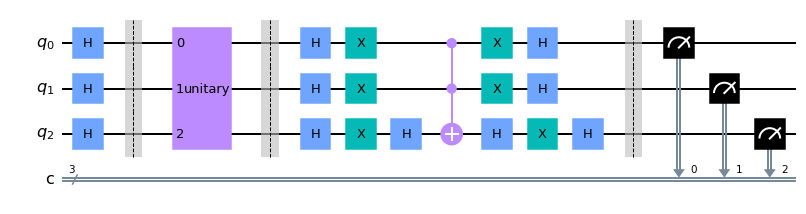

In [14]:
# Number of Qubits
num_qubits = 3

# Defining Quantum, Classical Registers and Quantum Circuit 
qr = QuantumRegister(num_qubits, 'q')
cr = ClassicalRegister(num_qubits, 'c')

qcirc = QuantumCircuit(qr, cr)

# Step 1 - Applying Hadamard Gates to all the Qubits
for i in range(num_qubits):
    qcirc.h(i)

qcirc.barrier()

# Step 2 - Applying the Grover's Oracle Operator
qcirc.append(U_3, qr)

qcirc.barrier()

# Step 3 - Grover's Diffusion Circuit
for qubit in range(num_qubits):
    qcirc.h(qubit)
for qubit in range(num_qubits):
    qcirc.x(qubit)
qcirc.h(num_qubits-1)
qcirc.mct(list(range(num_qubits-1)), num_qubits-1)
qcirc.h(num_qubits-1)
for qubit in range(num_qubits):
    qcirc.x(qubit)
for qubit in range(num_qubits):
    qcirc.h(qubit)
    
qcirc.barrier()

# Measuring all the Qubits
qcirc.measure([0,1,2],[0,1,2])

# Visualizing the Grover's Circuit
qcirc.draw('mpl')

## Simulating 3 Qubit Grover's Circuit


Total counts are: {'101': 504, '110': 496}


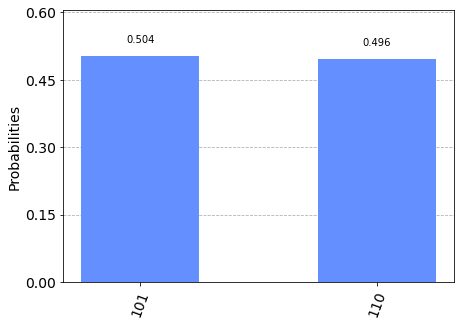

In [15]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qcirc, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qcirc)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)